# 포켓몬스터 스위치 시리즈 분석

0. 모듈&라이브러리

In [2]:
import sys 
import os  

import pandas as pd  
import numpy as np   

import requests
from bs4 import BeautifulSoup    
from selenium import webdriver   
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller 

import time    
from tqdm import tqdm_notebook   
import re 

import warnings
warnings.filterwarnings('ignore')

In [3]:
keyword1 = 'pokemon-sword'
keyword2 = 'pokemon-shield'

## 1. 메타크리틱 유저 리뷰 크롤링

### 1.1 포켓몬 소드 리뷰 크롤링

#### 1.1.1 첫 페이지 크롤링

In [4]:
# 크롬 웹 브라우저 실행 (keyword 검색결과)


chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)
driver.get('https://www.metacritic.com/game/switch/{}/user-reviews'.format(keyword1)) # Query parameter로 직접 keyword 넣는 방식

# 페이지 수 가져오기
last_page=driver.find_element_by_css_selector('.page.last_page').text
last_page=int(re.sub('[\D]','',last_page)) # 정규표현식으로 비숫자 제거 

# Expand 클릭
a = driver.find_elements_by_css_selector('.toggle_expand_collapse.toggle_expand')
for j in range(0,len(a)):
    a[j].click()
    time.sleep(0.1)
    
# grade 수집
grade_list=[]
grade_raw = driver.find_elements_by_class_name('review_grade')
del grade_raw[-3:] # 뒤의 세개의 grade는 critic grade 이므로 삭제
for l in grade_raw: 
    grade_int = int(l.text)
    grade_list.append(grade_int)
print('grade 수집/정제 완료')
time.sleep(1)


# reivew 수집
review_list = []
review_raw=driver.find_elements_by_css_selector('.body.product_reviews .review_body')
time.sleep(1)
for k in tqdm_notebook(review_raw):
    review_text = k.text
    review_list.append(review_text)
print('review 수집/정제 완료')

time.sleep(1)

driver.quit()

grade 수집/정제 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료


#### 1.1.2 나머지 페이지 크롤링

In [993]:
i=1 # url에서 page1 이 실제 두번째 페이지를 나타냄
while i < last_page:
       
# Expand 클릭
    chrome_path = chromedriver_autoinstaller.install()
    driver = webdriver.Chrome(chrome_path)
    driver.get('https://www.metacritic.com/game/switch/{}/user-reviews?page={}'.format(keyword1,i))
    time.sleep(10)
    
    a = driver.find_elements_by_css_selector('.toggle_expand_collapse.toggle_expand')
    for j in range(0,len(a)):
        a[j].click()
        time.sleep(0.1)

# grade 수집/정제
    grade_raw = driver.find_elements_by_class_name('review_grade')
    del grade_raw[-3:]  # 뒤의 세개의 grade는 critic grade 이므로 삭제
    for l in grade_raw: 
        grade_int = int(l.text)
        grade_list.append(grade_int)
    print('grade 수집/정제 완료')
    time.sleep(1)

# review 수집/정제
    review_raw=driver.find_elements_by_css_selector('.body.product_reviews .review_body')
    time.sleep(1)
    for k in tqdm_notebook(review_raw):
        review_text = k.text
        review_list.append(review_text)
    print('review 수집/정제 완료')
    time.sleep(1)
    
    print(i+1,'page 작업 완료')
    
    if i+1 == last_page:
        print('#####모든 작업이 완료되었습니다.#####')
    i += 1
    driver.close()
    time.sleep(5)

WebDriverException: Message: unknown error: cannot determine loading status
from disconnected: received Inspector.detached event
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x01120613+2557459]
	Ordinal0 [0x010B79D1+2128337]
	Ordinal0 [0x00FB2DF8+1060344]
	Ordinal0 [0x00FA5FB4+1007540]
	Ordinal0 [0x00FA5BF3+1006579]
	Ordinal0 [0x00FA526D+1004141]
	Ordinal0 [0x00FA43EA+1000426]
	Ordinal0 [0x00FA47B7+1001399]
	Ordinal0 [0x00FAF691+1046161]
	Ordinal0 [0x00FA59AD+1005997]
	Ordinal0 [0x00FA65C0+1009088]
	Ordinal0 [0x00FA5C0E+1006606]
	Ordinal0 [0x00FA526D+1004141]
	Ordinal0 [0x00FA43EA+1000426]
	Ordinal0 [0x00FA46A6+1001126]
	Ordinal0 [0x00FB43EA+1065962]
	Ordinal0 [0x01007AED+1407725]
	Ordinal0 [0x00FF7A5C+1342044]
	Ordinal0 [0x0100753A+1406266]
	Ordinal0 [0x00FF78C6+1341638]
	Ordinal0 [0x00FD3686+1193606]
	Ordinal0 [0x00FD4516+1197334]
	GetHandleVerifier [0x012BA922+1624850]
	GetHandleVerifier [0x013685FC+2336748]
	GetHandleVerifier [0x011B4041+549425]
	GetHandleVerifier [0x011B3143+545587]
	Ordinal0 [0x010BD34E+2151246]
	Ordinal0 [0x010C1918+2169112]
	Ordinal0 [0x010C1A60+2169440]
	Ordinal0 [0x010CB650+2209360]
	BaseThreadInitThunk [0x753EFA29+25]
	RtlGetAppContainerNamedObjectPath [0x76FE7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x76FE7A6E+238]


#### 1.1.3 데이터프레임으로 만들기

In [964]:
df_sword = pd.DataFrame({'Review':review_list,'Grade':grade_list})

In [1468]:
df_sword.isna().sum()

Review    0
Grade     0
Game      0
dtype: int64

In [966]:
df_sword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2741 non-null   object
 1   Grade   2741 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.0+ KB


In [967]:
df_sword.head()

,Review,Grade
0,My copy of Sword and Shield came in the mail a...,5
1,The game is meh not even counting the Pokemon ...,5
2,This is what happen if a company realize that ...,3
3,I really wish the games were good. I don't lea...,3
4,"The critics calling Sword and Sheild ""the best...",0


In [968]:
df_sword.to_csv('sword.csv',encoding='utf-8-sig')

### 1.2 포켓몬 쉴드 리뷰 크롤링

#### 1.2.1 첫 페이지 크롤링

In [969]:
# 크롬 웹 브라우저 실행 (keyword 검색결과)
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)
driver.get('https://www.metacritic.com/game/switch/{}/user-reviews'.format(keyword2)) # Query parameter로 직접 keyword 넣는 방식

# 페이지 수 가져오기
last_page=driver.find_element_by_css_selector('.page.last_page').text
last_page=int(re.sub('[\D]','',last_page)) # 정규표현식으로 비숫자 제거 

# Expand 클릭
a = driver.find_elements_by_css_selector('.toggle_expand_collapse.toggle_expand')
for j in range(0,len(a)):
    a[j].click()
    time.sleep(0.1)
    
# grade 수집
grade_list_shield=[]
grade_raw = driver.find_elements_by_class_name('review_grade')
del grade_raw[-3:] # 뒤의 세개의 grade는 critic grade 이므로 삭제
for l in grade_raw: 
    grade_int = int(l.text)
    grade_list_shield.append(grade_int)
time.sleep(1)


# reivew 수집
review_list_shield= []
review_raw=driver.find_elements_by_css_selector('.body.product_reviews .review_body')
time.sleep(1)
for k in tqdm_notebook(review_raw):
    review_text = k.text
    review_list_shield.append(review_text)
print('review 수집/정제 완료')

time.sleep(1)

driver.quit()

  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료


In [970]:
len(grade_list_shield)

100

In [971]:
len(review_list_shield)

100

#### 1.2.2 나머지 페이지 크롤링

In [972]:
i=1 # url에서 page1 이 실제 두번째 페이지를 나타냄
while i < last_page:
       
# Expand 클릭
    chrome_path = chromedriver_autoinstaller.install()
    driver = webdriver.Chrome(chrome_path)
    driver.get('https://www.metacritic.com/game/switch/{}/user-reviews?page={}'.format(keyword2,i))
    time.sleep(10)
    
    a = driver.find_elements_by_css_selector('.toggle_expand_collapse.toggle_expand')
    for j in range(0,len(a)):
        a[j].click()
        time.sleep(0.1)

# grade 수집/정제
    grade_raw = driver.find_elements_by_class_name('review_grade')
    del grade_raw[-3:]  # 뒤의 세개의 grade는 critic grade 이므로 삭제
    for l in grade_raw: 
        grade_int = int(l.text)
        grade_list_shield.append(grade_int)
    time.sleep(1)

# review 수집/정제
    review_raw=driver.find_elements_by_css_selector('.body.product_reviews .review_body')
    time.sleep(1)
    for k in tqdm_notebook(review_raw):
        review_text = k.text
        review_list_shield.append(review_text)
    print('review 수집/정제 완료')
    time.sleep(1)
    
    print(i+1,'page 작업 완료')
    
    if i+1 == last_page:
        print('#####모든 작업이 완료되었습니다.#####')
    i += 1
    driver.close()
    time.sleep(5)

  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
2 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
3 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
4 page 작업 완료


0it [00:00, ?it/s]

review 수집/정제 완료
5 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
6 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
7 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
8 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
9 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
10 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
11 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
12 page 작업 완료


0it [00:00, ?it/s]

review 수집/정제 완료
13 page 작업 완료


  0%|          | 0/100 [00:00<?, ?it/s]

review 수집/정제 완료
14 page 작업 완료


  0%|          | 0/24 [00:00<?, ?it/s]

review 수집/정제 완료
15 page 작업 완료
#####모든 작업이 완료되었습니다.#####


In [973]:
len(grade_list_shield)

1224

In [974]:
len(review_list_shield)

1224

#### 1.2.3 데이터프레임으로 만들기

In [975]:
df_shield = pd.DataFrame({'Review':review_list_shield,'Grade':grade_list_shield})

In [1469]:
df_shield.isna().sum()

Review    0
Grade     0
Game      0
dtype: int64

In [977]:
df_shield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1224 non-null   object
 1   Grade   1224 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.2+ KB


In [978]:
df_shield.head(10)

,Review,Grade
0,Let us address the elephant in the room first....,4
1,"Reposting from my Pokémon Sword review, since ...",3
2,What should have been a giant leap to signific...,4
3,10 routes\nVirtually no difficulty\n2 endgame ...,4
4,"Was promised a game for ""long time fans of the...",1
5,"After ""it all comes together"" and ""ultra chang...",2
6,This game is rushed and unfinished. No matter ...,0
7,This game made my daughter cry. Many of her fa...,0
8,"This game feels like a port from the 3DS, not ...",4
9,The quality of this game REALLY does not justi...,2


In [979]:
df_shield.to_csv('shield.csv',encoding='utf-8-sig')

#### 1.2.4 sword, sheild 데이터 프레임 하나로 합치기

In [1471]:
df_sword['Game'] = 'sword' # Game 컬럼에 sword 항목 추가

In [1589]:
df_sword

,Review,Grade,Game
0,My copy of Sword and Shield came in the mail a...,5,sword
1,The game is meh not even counting the Pokemon ...,5,sword
2,This is what happen if a company realize that ...,3,sword
3,I really wish the games were good. I don't lea...,3,sword
4,"The critics calling Sword and Sheild ""the best...",0,sword
...,...,...,...
2736,Sobble is cool I like it when he grows big Sob...,5,sword
2737,Die Story ist unglaublich langweilig und die C...,6,sword
2738,"Disappointing ""next-gen"" episode for a great s...",3,sword
2739,"I liked the game, but the DLCs ruin it. In the...",8,sword


In [1545]:
df_sword.isnull().sum()

Review    0
Grade     0
Game      0
dtype: int64

In [1472]:
df_shield['Game']='shield' # Game 컬럼에 shield 항목추가

In [1488]:
df_shield

,Review,Grade,Game
0,Let us address the elephant in the room first....,4,shield
1,"Reposting from my Pokémon Sword review, since ...",3,shield
2,What should have been a giant leap to signific...,4,shield
3,10 routes\nVirtually no difficulty\n2 endgame ...,4,shield
4,"Was promised a game for ""long time fans of the...",1,shield
...,...,...,...
1219,Gratamente mejorable en sus graficos especialm...,9,shield
1220,Best competitive era for Pokemon. Dynamax is p...,8,shield
1221,"I absolutely love this remake, opening the gam...",7,shield
1222,It has potential. It has so many interesting t...,8,shield


In [1547]:
df_shield.isnull().sum()

Review    0
Grade     0
Game      0
dtype: int64

In [1841]:
df_all = pd.concat([df_sword,df_shield],ignore_index=True) #concat 으로 합치기
df_all

,Review,Grade,Game
0,My copy of Sword and Shield came in the mail a...,5,sword
1,The game is meh not even counting the Pokemon ...,5,sword
2,This is what happen if a company realize that ...,3,sword
3,I really wish the games were good. I don't lea...,3,sword
4,"The critics calling Sword and Sheild ""the best...",0,sword
...,...,...,...
3960,Gratamente mejorable en sus graficos especialm...,9,shield
3961,Best competitive era for Pokemon. Dynamax is p...,8,shield
3962,"I absolutely love this remake, opening the gam...",7,shield
3963,It has potential. It has so many interesting t...,8,shield


In [1842]:
df_all.isna().sum()

Review    0
Grade     0
Game      0
dtype: int64

In [1843]:
df_all.reset_index(drop=True,inplace=True) # 인덱스 초기화 하고 대체


In [1844]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965 entries, 0 to 3964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3965 non-null   object
 1   Grade   3965 non-null   int64 
 2   Game    3965 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.1+ KB


In [1845]:
df_all.to_csv('all_raw.csv',encoding='utf-8-sig')

## 2. 데이터 전처리

In [72]:

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import pyprind
import re

#### konlpy 설치 (jpype, java_home 환경변수 설정, 시스템파일 수정), wordcloud 설치 과정은 따로 기재하지 않았습니다. #####

import os
import sys
import pandas as pd
import numpy as np
import re

from konlpy.tag import Okt # 형태소분석기 : Openkoreatext
from collections import Counter # 빈도 수 세기
from wordcloud import WordCloud # wordcloud 만들기

import matplotlib.pyplot as plt # 시각화
import matplotlib as mpl
import seaborn as sns 

from matplotlib import font_manager, rc # font 설정
import nltk # natural language toolkit : 자연어 처리
# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':

# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  # 한글 폰트 깨지는 겨우
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [168]:
# csv 불러오기
df_all = pd.read_csv('all_raw.csv',encoding='utf-8')
df_all = df_all.drop("Unnamed: 0", axis=1) # csv 1열 unnamed 제거

In [169]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965 entries, 0 to 3964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3965 non-null   object
 1   Grade   3965 non-null   int64 
 2   Game    3965 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.1+ KB


In [170]:
df_all.isna().sum()

Review    0
Grade     0
Game      0
dtype: int64

In [171]:
df_all = df_all.dropna(axis=0)

In [172]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 3964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3965 non-null   object
 1   Grade   3965 non-null   int64 
 2   Game    3965 non-null   object
dtypes: int64(1), object(2)
memory usage: 123.9+ KB


In [13]:
df_all.isna().sum()

Review    0
Grade     0
Game      0
dtype: int64

### 2.1 특정 문장 제거

In [173]:
df_all2 = df_all.copy() # df_all 복사해서 df_all2로 정제 진행 -> 이후 review 컬럼에 덮어씌우기만 하면 됨 / 제대로 전처리 되었는지 비교하기 좋음

In [174]:

# This review contains spoilers 문장, collapse 단어 제거
a =df_all2.index[df_all2['Review'].str.contains('This review contains spoilers.')].tolist() # This review contains spoilers 문장을 포함하는 index 가져오기
b =df_all2.index[df_all2['Review'].str.contains('Collapse')].tolist() # Collapse 문장을 포함하는 index 가져오기 index 가져오기
df_all2=df_all2.Review.str.split('.') # . 기준으로 스플릿 -> 문장 단위로 나뉨 / pandas.core.series.Seriess로 자료형 변경됨
for x in a:
    del df_all2.iloc[x][0] # This review contains spoilers 제거
for y in b:
    del df_all2.iloc[y][-1] # collapse 제거
df_all2=df_all2.str.join(sep='.') # 다시 글 하나로 합치기
df_all2=pd.DataFrame(df_all2) # pandas.core.series.Series를 dataframe으로 바꾸기

### 2.2 정규표현식을 이용한 데이터 정제

In [175]:
def preprocessor(text): # 머신러닝 교과서 영화 리뷰 감성분석 참고 (알고리즘을 위한 것인지 모르겠지만 깔끔하게 지우지못함)
    text = re.sub('<[^>]*>', '', text) # html문자제거
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text) # :), :/,:\ 등의 이모티콘 모두 찾기 
    text = (re.sub('[^A-Za-z]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')) # Non-alphanumeric 문자 및 '-' 제외하고 삭제하며 소문자화, 끝에 이모티콘 붙이기
    return text

In [176]:
df_all['Review'] = df_all2['Review'].apply(preprocessor) #df_all의 review 컬럼에 정제 결과 덮어 씌우기
df_all

,Review,Grade,Game
0,my copy of sword and shield came in the mail a...,5,sword
1,the game is meh not even counting the pokemon ...,5,sword
2,this is what happen if a company realize that ...,3,sword
3,i really wish the games were good i don t leav...,3,sword
4,the critics calling sword and sheild the best ...,0,sword
...,...,...,...
3960,gratamente mejorable en sus graficos especialm...,9,shield
3961,best competitive era for pokemon dynamax is pr...,8,shield
3962,i absolutely love this remake opening the game...,7,shield
3963,it has potential it has so many interesting th...,8,shield


In [177]:
df_all=pd.DataFrame(df_all)

In [178]:
df_all.info() #

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 3964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3965 non-null   object
 1   Grade   3965 non-null   int64 
 2   Game    3965 non-null   object
dtypes: int64(1), object(2)
memory usage: 123.9+ KB


In [179]:
df_all.to_csv('all_clean.csv',encoding='utf-8')

### 2.3 영어 이외 다른 언어 리뷰 분류하기

In [1775]:
!pip install langid  # 언어 감지 라이브러리 중 하나 : 구글 신이시여!!

ERROR: Invalid requirement: '#'


In [180]:
# Review의 언어 판별해서 a 리스트에 넣기 : 정확도를 확신할 수 없으나 다른 방법이 없음
import langid # 언어 판별 라이브러리
a = []
for i in df_all['Review']:
    detected = langid.classify(i)
    a.append(detected[0])

In [181]:
df_all['Language'] = a  # df_all에 Language 칼럼으로 판별 값 넣어줌

In [182]:
df_all['Language'].unique() # 언어 종류 파악

array(['en', 'es', 'fr', 'ca', 'pt', 'sl', 'de', 'it', 'hr', 'id', 'vi',
       'lv', 'an', 'gl'], dtype=object)

In [183]:
df_all[df_all['Language']=='en'] # 영어 리뷰의 갯수 파악

,Review,Grade,Game,Language
0,my copy of sword and shield came in the mail a...,5,sword,en
1,the game is meh not even counting the pokemon ...,5,sword,en
2,this is what happen if a company realize that ...,3,sword,en
3,i really wish the games were good i don t leav...,3,sword,en
4,the critics calling sword and sheild the best ...,0,sword,en
...,...,...,...,...
3958,this game is a stain on the pants of the pok m...,0,shield,en
3961,best competitive era for pokemon dynamax is pr...,8,shield,en
3962,i absolutely love this remake opening the game...,7,shield,en
3963,it has potential it has so many interesting th...,8,shield,en


In [186]:
df_all=df_all[df_all['Language']=='en'].reset_index(drop=True) 

In [187]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    3415 non-null   object
 1   Grade     3415 non-null   int64 
 2   Game      3415 non-null   object
 3   Language  3415 non-null   object
dtypes: int64(1), object(3)
memory usage: 106.8+ KB


In [189]:
df_all.to_csv('poke_all_clean.csv',encoding='utf-8')

In [194]:
df_all = pd.read_csv('poke_all_clean.csv',encoding='utf-8')
df_all = df_all.dropna(axis=0)
df_all = df_all.drop("Unnamed: 0", axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 0 to 3414
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    3342 non-null   object
 1   Grade     3342 non-null   int64 
 2   Game      3342 non-null   object
 3   Language  3342 non-null   object
dtypes: int64(1), object(3)
memory usage: 130.5+ KB


In [195]:
df_all.to_csv('poke_all_clean.csv',encoding='utf-8')

## 3. 데이터 시각화

In [43]:
import matplotlib.pyplot as plt  # 시각화 라이브러리
import seaborn as sns            # 시각화 라이브러리

In [196]:
# csv 불러오기
df_all = pd.read_csv('poke_all_clean.csv',encoding='utf-8')
df_all = df_all.drop("Unnamed: 0", axis=1) # csv 1열 unnamed 제거

In [197]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    3342 non-null   object
 1   Grade     3342 non-null   int64 
 2   Game      3342 non-null   object
 3   Language  3342 non-null   object
dtypes: int64(1), object(3)
memory usage: 104.6+ KB


In [32]:
df_all.isna().sum()

Review      73
Grade        0
Game         0
Language     0
dtype: int64

In [40]:
df_all = df_all.dropna(axis=0)

#### 3.1 Count plot

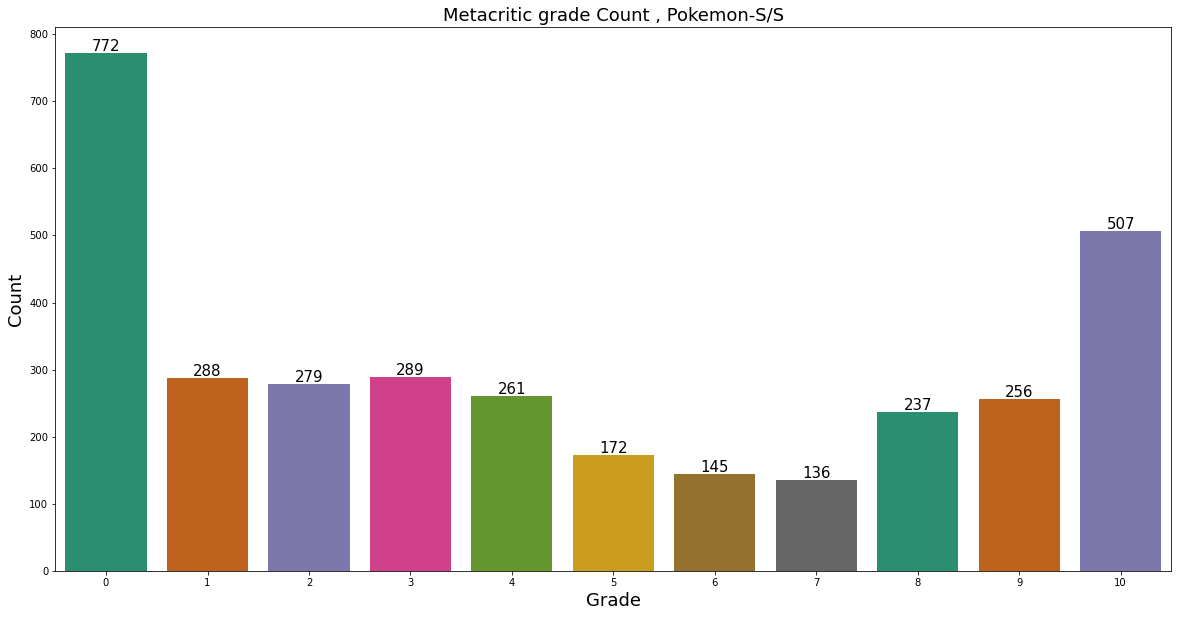

In [44]:
plt.figure(figsize=(20, 10))
all_count=sns.countplot(x='Grade',data=df_all,palette='Dark2')
all_count.set_title('Metacritic grade Count , Pokemon-S/S', fontsize=18)
all_count.set_xlabel('Grade', fontdict={'size':18})                   # x축 이름
all_count.set_ylabel('Count', fontdict={'size':18}) 
for p in all_count.patches: # count 넣기
    height = p.get_height()
    all_count.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 15)
plt.show()

### 3.2 Pie chart

In [45]:
df_all['Grade'].value_counts()

0     772
10    507
3     289
1     288
2     279
4     261
9     256
8     237
5     172
6     145
7     136
Name: Grade, dtype: int64

In [46]:
df_all['Grade'].value_counts(normalize=True)

0     0.230999
10    0.151706
3     0.086475
1     0.086176
2     0.083483
4     0.078097
9     0.076601
8     0.070916
5     0.051466
6     0.043387
7     0.040694
Name: Grade, dtype: float64

In [48]:
labels_sword = '0','10','3','1','2','4','9','8','5','6','7'

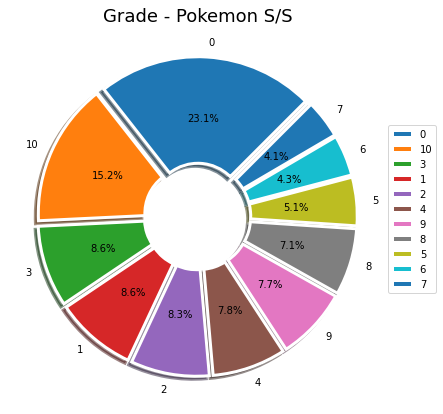

In [49]:
plt.figure(figsize=(7,7))
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

# pie chart 만들기(차트 띄우기, labels 달기, 각 조정, 그림자, 값 소숫점 표시)
plt.pie(df_all['Grade'].value_counts(), startangle=45, shadow=True, labels = labels_sword ,autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops)


# 라벨, 타이틀 달기
plt.title('Grade - Pokemon S/S', fontsize=18)
plt.legend(loc=(1.0,0.3))


plt.show()

### 3.3 Box plot

In [50]:
df_all.describe()

,Grade
count,3342.000000
mean,4.401257
std,3.719872
min,0.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,10.000000


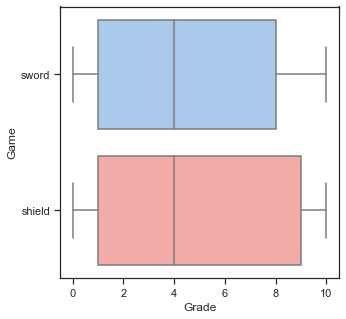

In [51]:
# 포켓몬 소드와 쉴드의 box plot 비교

plt.figure(figsize=(5, 5))
sns.set(style='ticks', palette = 'pastel') # style = "ticks", "whitegrid"   / palette = "pastel", "Set3"
sns.boxplot(x='Grade', y="Game", palette=['b', 'r'], data=df_all)
plt.show()            

In [52]:
df_all[df_all['Game']=='sword'].describe()

,Grade
count,2301.000000
mean,4.304650
std,3.679405
min,0.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,10.000000


In [53]:
df_all[df_all['Game']=='shield'].describe()

,Grade
count,1041.000000
mean,4.614793
std,3.800877
min,0.000000
25%,1.000000
50%,4.000000
75%,9.000000
max,10.000000


### 3.4 wordcloud

In [ ]:
## !pip install PyPrind

In [73]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### 3.4.1 데이터 탐색 : 긍정/부정 데이터 분류

In [199]:
# csv 불러오기
df_all = pd.read_csv('poke_all_clean.csv',encoding='utf-8')
df_all = df_all.drop("Unnamed: 0", axis=1) # csv 1열 unnamed 제거

In [55]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 0 to 3414
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    3342 non-null   object
 1   Grade     3342 non-null   int64 
 2   Game      3342 non-null   object
 3   Language  3342 non-null   object
dtypes: int64(1), object(3)
memory usage: 259.6+ KB


In [56]:
df_all.describe()

,Grade
count,3342.000000
mean,4.401257
std,3.719872
min,0.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,10.000000


긍정 리뷰 분석

In [200]:
df_pos = df_all[df_all['Grade']>=5] # grade 5점 이상은 긍정으로 분류

In [201]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 3340
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    1453 non-null   object
 1   Grade     1453 non-null   int64 
 2   Game      1453 non-null   object
 3   Language  1453 non-null   object
dtypes: int64(1), object(3)
memory usage: 56.8+ KB


In [202]:
# csv 저장
df_pos.to_csv('df_pos.csv',encoding='utf-8')

In [59]:
# 긍정 리뷰들 리스트로 변환
pos_list = df_pos['Review'].tolist()
len(pos_list)

1453

In [60]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(pos_list)):
    if type(pos_list[i]) != str:
        pos_list[i] = str(pos_list[i])

In [61]:
# 리스트 중 str 타입이 아닌 요소들(nan값)이 존재함을 확인
for i in pos_list:
    if type(i) is not str:
        i = str(i)
        print(i)

In [62]:
# 긍정 수집한 글들을 한 문장으로 합치기
pos_content_text = ''

for each_line in pos_list[:1472]:
    pos_content_text = pos_content_text + each_line

In [67]:
# nltk 분해기로 단어 토큰화
stop = stopwords.words('english')# 토큰화 작업을 위한 리소스 다운로드
pos_word_tokens = [w for w in nltk.tokenize.word_tokenize(pos_content_text) if w not in stop]
len(pos_word_tokens)


102072

In [74]:
stop_words = [',','0','game','pokemon','games','pokémon','even','really','much','would','also','get','like','good','great','fun','new','still','lot','people','think','pok','mon','one']
pos_word_tokens = [word for word in pos_word_tokens if not word in stop_words] #불용어 제거
pos_cleaned_counted=Counter(pos_word_tokens)
pos_cleaned_counted_ranked = dict(pos_cleaned_counted.most_common(300)) # 내림차순 정렬 후 딕셔너리화
pos_cleaned_counted_ranked

{'story': 697,
 'wild': 611,
 'area': 558,
 'time': 473,
 'graphics': 441,
 'best': 423,
 'bad': 402,
 'sword': 397,
 'play': 377,
 'better': 370,
 'shield': 357,
 'many': 348,
 'gym': 344,
 'battles': 343,
 'series': 335,
 'first': 329,
 'dex': 326,
 'well': 309,
 'feel': 300,
 'animations': 299,
 'battle': 299,
 'played': 299,
 'every': 294,
 'love': 286,
 'look': 283,
 'could': 283,
 'make': 281,
 'since': 278,
 'hours': 272,
 'go': 261,
 'far': 251,
 'say': 250,
 'playing': 244,
 'way': 243,
 'experience': 239,
 'pretty': 238,
 'see': 235,
 'made': 223,
 'things': 223,
 'switch': 223,
 'national': 220,
 'previous': 218,
 'characters': 214,
 'easy': 211,
 'ever': 211,
 'want': 209,
 'world': 209,
 'however': 207,
 'bit': 202,
 'feels': 200,
 'cut': 200,
 'online': 199,
 'actually': 199,
 'makes': 198,
 'amazing': 198,
 'moves': 197,
 'going': 196,
 'team': 190,
 'main': 190,
 'around': 190,
 'give': 187,
 'overall': 186,
 'little': 185,
 'let': 180,
 'gameplay': 178,
 'old': 177,
 '

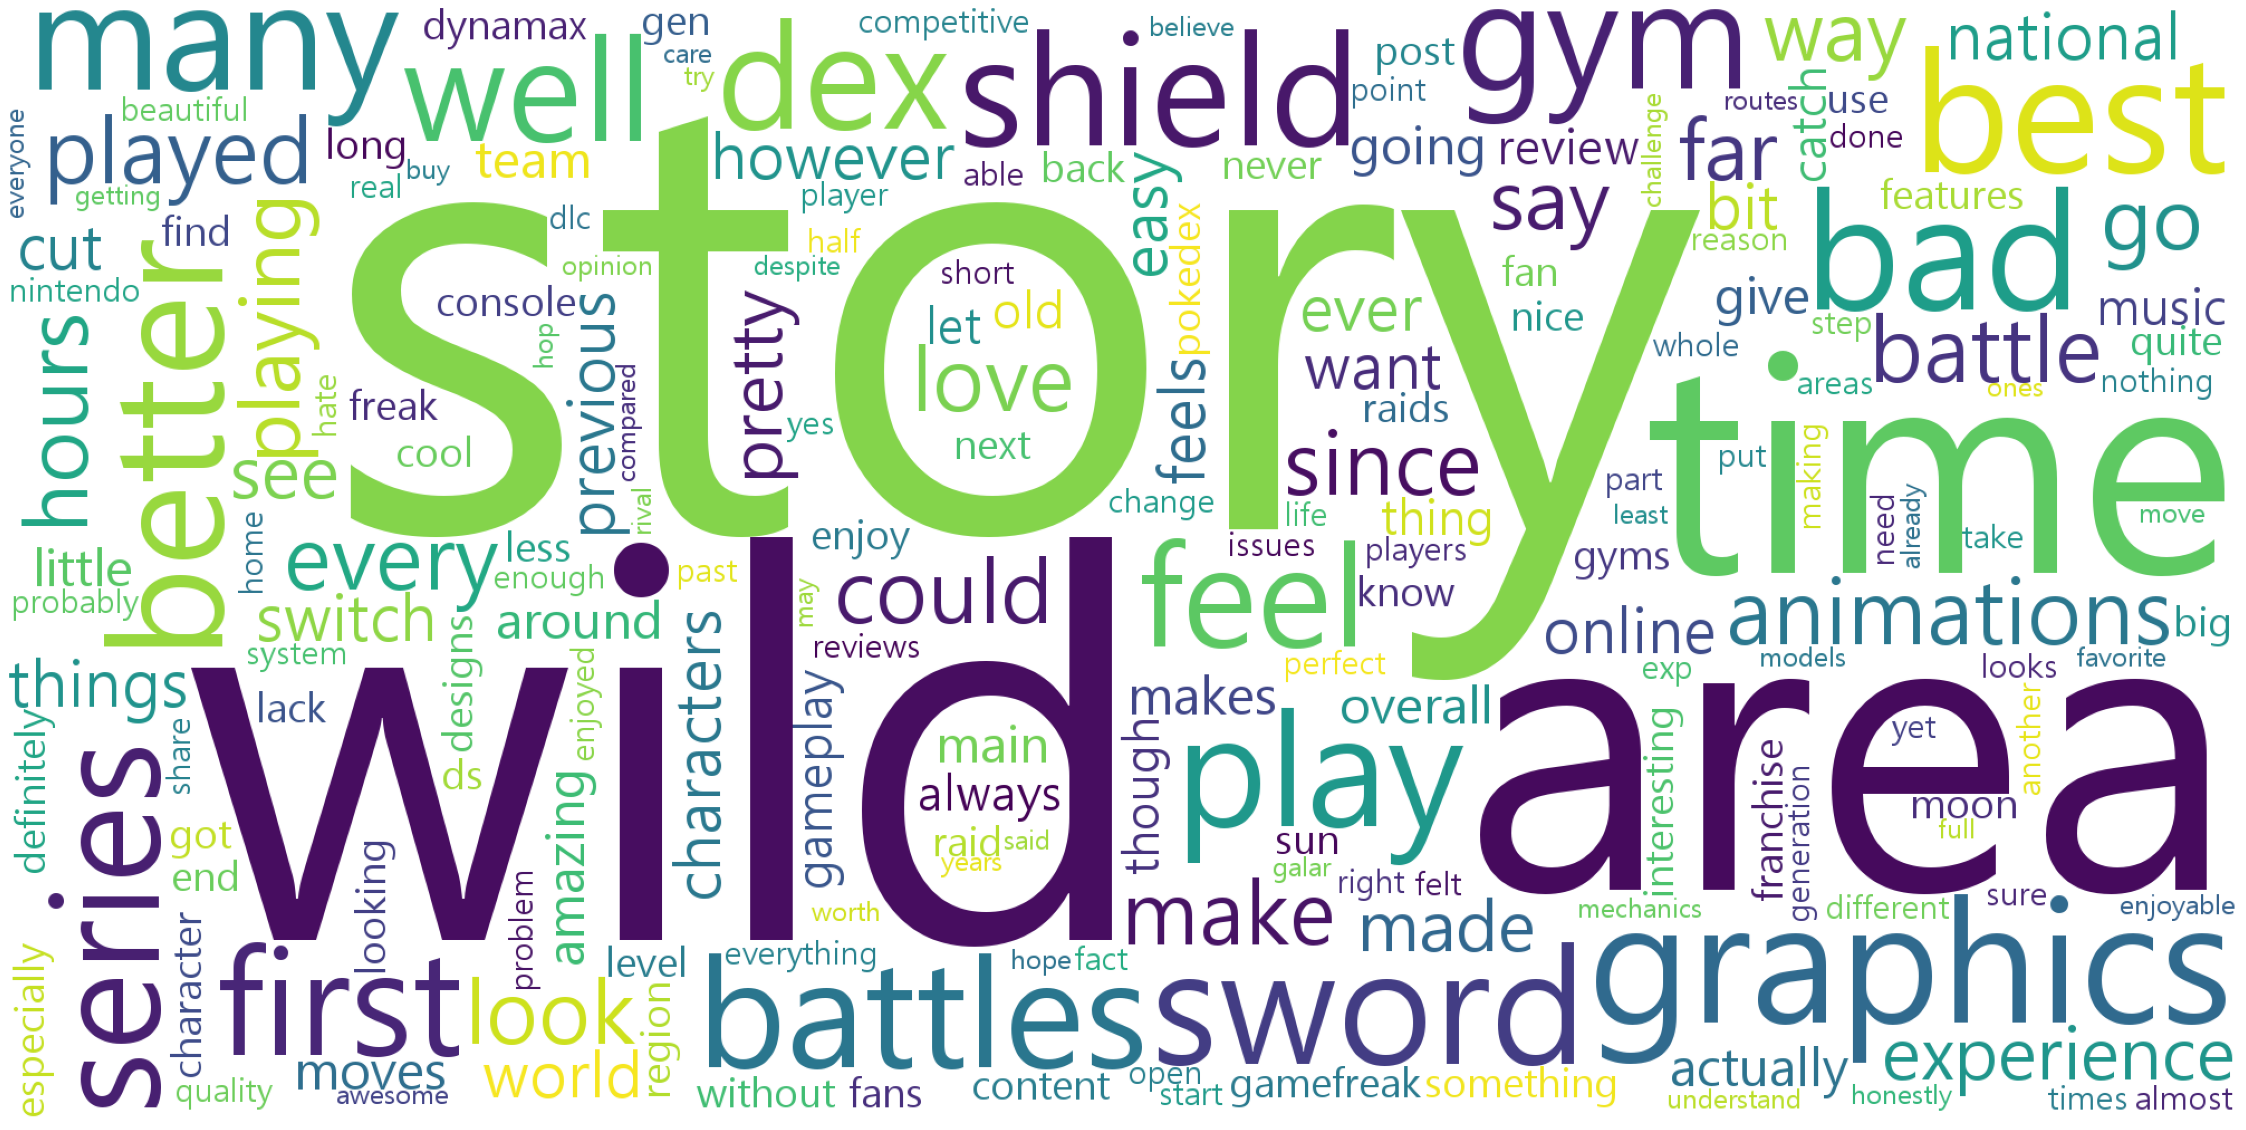

In [75]:
# wordcloud 만들기
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',background_color="white",width=2000, height=1000).generate_from_frequencies(pos_cleaned_counted_ranked) # font 경로 개별적으로 설정해야함
plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.axis('off')
plt.show()

부정 리뷰 분석

In [203]:
df_neg = df_all[df_all['Grade']<5] # grade 5점 미만은 긍정으로 분류

In [204]:
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 2 to 3341
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    1889 non-null   object
 1   Grade     1889 non-null   int64 
 2   Game      1889 non-null   object
 3   Language  1889 non-null   object
dtypes: int64(1), object(3)
memory usage: 73.8+ KB


In [205]:
# csv 저장
df_neg.to_csv('df_neg.csv',encoding='utf-8')

In [78]:
# 부정 리뷰들 리스트로 변환
neg_list = df_neg['Review'].tolist()
len(neg_list)

1889

In [79]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(neg_list)):
    if type(neg_list[i]) != str:
        neg_list[i] = str(neg_list[i])

In [80]:
# 리스트 중 str 타입이 아닌 요소들(nan값)이 존재함을 확인
for i in neg_list:
    if type(i) is not str:
        i = str(i)
        print(i)

In [81]:
# 부정 수집한 글들을 한 문장으로 합치기
neg_content_text = ''

for each_line in neg_list[:1922]:
    neg_content_text = neg_content_text + each_line

In [82]:
# nltk 분해기로 단어 토큰화
stop = stopwords.words('english')# 토큰화 작업을 위한 리소스 다운로드
neg_word_tokens = [w for w in nltk.tokenize.word_tokenize(neg_content_text) if w not in stop]
len(neg_word_tokens)


143790

In [83]:
stop_words = [',','0','game','pokemon','games','pokémon','even','really','much','would','also','get','bad','many','could','make','still','someone','look','go','new','first','moves','every','feels','lot','made','feel','every','like','pok','mon','way','one','good']
neg_word_tokens = [word for word in neg_word_tokens if not word in stop_words] #불용어 제거
neg_cleaned_counted=Counter(neg_word_tokens)
neg_cleaned_counted_ranked = dict(neg_cleaned_counted.most_common(300)) # 내림차순 정렬 후 딕셔너리화
neg_cleaned_counted_ranked

{'animations': 780,
 'story': 689,
 'time': 645,
 'wild': 618,
 'graphics': 601,
 'area': 573,
 'cut': 547,
 'gamefreak': 528,
 'content': 512,
 'series': 491,
 'switch': 473,
 'ds': 470,
 'battle': 455,
 'better': 428,
 'sword': 413,
 'franchise': 404,
 'models': 403,
 'shield': 374,
 'previous': 367,
 'play': 346,
 'world': 338,
 'worst': 336,
 'freak': 333,
 'quality': 328,
 'since': 324,
 'dex': 323,
 'less': 319,
 'ever': 300,
 'half': 299,
 'people': 297,
 'easy': 296,
 'features': 290,
 'short': 289,
 'main': 288,
 'fans': 286,
 'battles': 286,
 'lack': 284,
 'post': 284,
 'want': 283,
 'gym': 281,
 'characters': 274,
 'point': 267,
 'fun': 267,
 'well': 266,
 'let': 265,
 'nothing': 262,
 'nintendo': 255,
 'console': 250,
 'see': 247,
 'boring': 243,
 'hours': 239,
 'buy': 236,
 'great': 232,
 'never': 231,
 'things': 227,
 'fan': 227,
 'online': 225,
 'played': 225,
 'removed': 224,
 'back': 224,
 'little': 223,
 'say': 223,
 'team': 223,
 'far': 219,
 'use': 219,
 'actually':

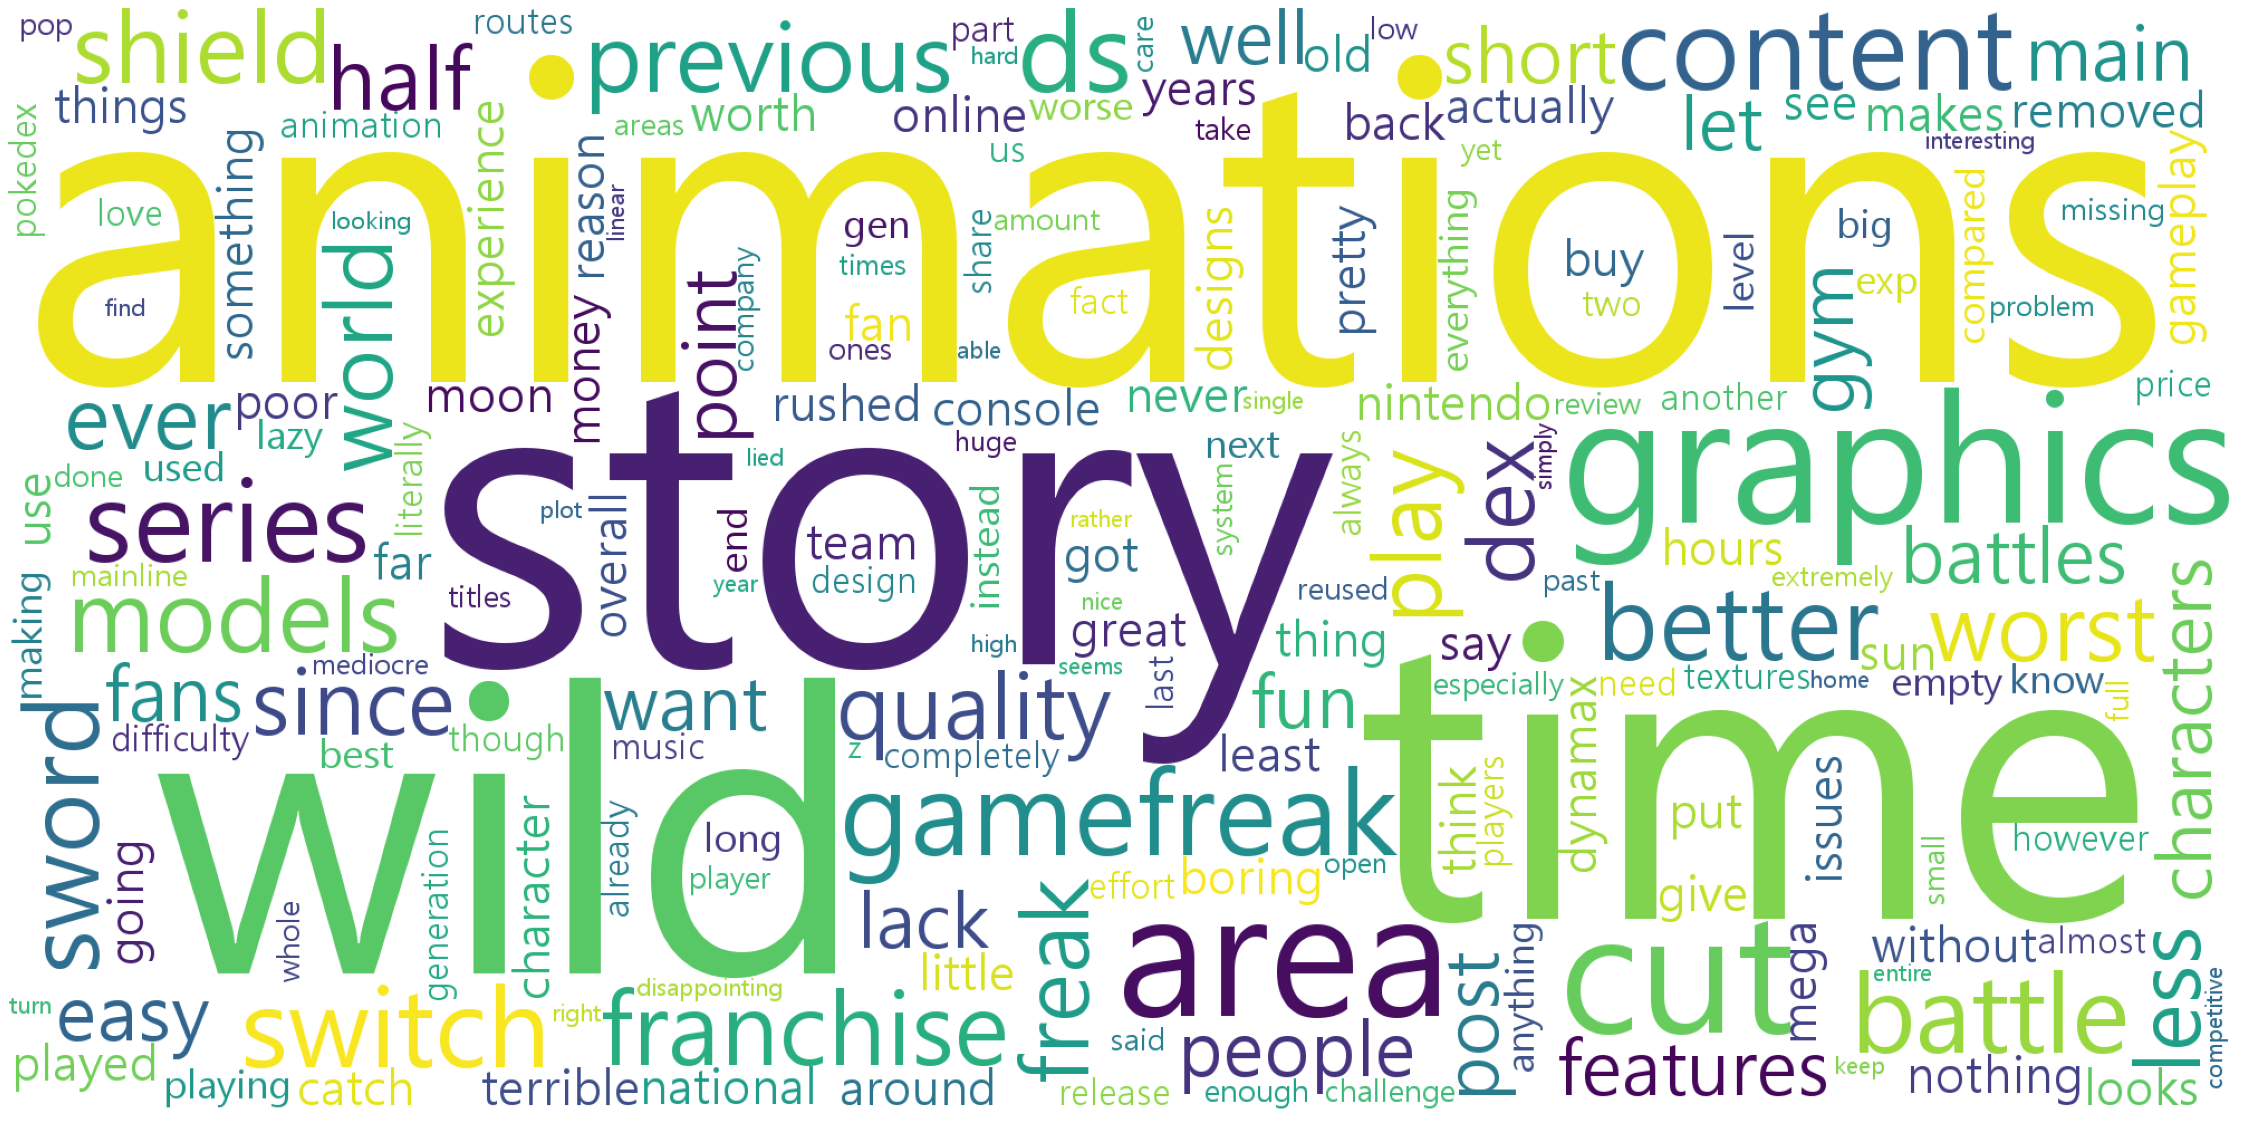

In [85]:
# wordcloud 만들기
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',background_color="white",width=2000, height=1000).generate_from_frequencies(neg_cleaned_counted_ranked) # font 경로 개별적으로 설정해야함
plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 4. 머신러닝 적용

### 4.1 데이터 셋 전처리 

In [211]:

df_pos = pd.read_csv('df_pos.csv',encoding='utf-8')
df_pos = df_pos.drop("Unnamed: 0", axis=1) # csv 1열 unnamed 제거
df_neg = pd.read_csv('df_neg.csv',encoding='utf-8')
df_neg = df_neg.drop("Unnamed: 0", axis=1) # csv 1열 unnamed 제거

In [212]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    1453 non-null   object
 1   Grade     1453 non-null   int64 
 2   Game      1453 non-null   object
 3   Language  1453 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.5+ KB


In [213]:
# 긍정 데이터셋을 1로 분류
df_pos['sentiment'] = 1
df_pos = df_pos.drop(['Language','Game','Grade'],axis=1)
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1453 non-null   object
 1   sentiment  1453 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.8+ KB


In [214]:
df_pos.reset_index(drop=True, inplace=True)
df_pos

,Review,sentiment
0,my copy of sword and shield came in the mail a...,1
1,the game is meh not even counting the pokemon ...,1
2,two steps forward five steps back while this g...,1
3,pok mon sword shield are fun fresh new pok mon...,1
4,your average pokemon game that ll probably be ...,1
...,...,...
1448,idk why people hate it so much best pokemon ga...,1
1449,is a great looking game compared to ds titles ...,1
1450,best competitive era for pokemon dynamax is pr...,1
1451,i absolutely love this remake opening the game...,1


In [215]:
# 부정 리뷰에 0 추가
df_neg['sentiment']=0
df_neg = df_neg.drop(['Language','Game','Grade'],axis=1)

In [119]:
df_neg.reset_index(drop=True, inplace=True)
df_neg

,Review,sentiment
0,this is what happen if a company realize that ...,0
1,i really wish the games were good i don t leav...,0
2,the critics calling sword and sheild the best ...,0
3,this game is a rushjob that said not all thing...,0
4,let us address the elephant in the room first ...,0
...,...,...
1884,there are so many things wrong with this game ...,0
1885,this game is awful i played it on release and ...,0
1886,this game has significantly less depth than es...,0
1887,this game is a stain on the pants of the pok m...,0


In [216]:
# 긍정 데이터셋 1450개 선별
df_pos = df_pos.iloc[:1450]
df_pos

,Review,sentiment
0,this is what happen if a company realize that ...,0
1,i really wish the games were good i don t leav...,0
2,the critics calling sword and sheild the best ...,0
3,this game is a rushjob that said not all thing...,0
4,let us address the elephant in the room first ...,0
...,...,...
1445,as the latest entries in the pokemon video gam...,0
1446,a huge step back in the franchise the game was...,0
1447,gf,0
1448,the game is fine it s pokemon it s exactly the...,0


In [217]:
# 부정 데이터셋 1450개 선별
df_neg = df_neg.iloc[:1450]
df_neg

,Review,sentiment
0,my copy of sword and shield came in the mail a...,1
1,the game is meh not even counting the pokemon ...,1
2,two steps forward five steps back while this g...,1
3,pok mon sword shield are fun fresh new pok mon...,1
4,your average pokemon game that ll probably be ...,1
...,...,...
1445,its alright the game has some elements of gre...,1
1446,the game has no reason for being this ugly it ...,1
1447,when i play this game let s just say my member...,1
1448,idk why people hate it so much best pokemon ga...,1


In [218]:
# 각 1450개 데이터셋 합치기
df = pd.concat([df_pos,df_neg],ignore_index=True) #concat 으로 합치기
df

,Review,sentiment
0,my copy of sword and shield came in the mail a...,1
1,the game is meh not even counting the pokemon ...,1
2,two steps forward five steps back while this g...,1
3,pok mon sword shield are fun fresh new pok mon...,1
4,your average pokemon game that ll probably be ...,1
...,...,...
2895,as the latest entries in the pokemon video gam...,0
2896,a huge step back in the franchise the game was...,0
2897,gf,0
2898,the game is fine it s pokemon it s exactly the...,0


In [219]:
# 컬럼명 변경
df.rename(columns ={'Review':'review'},inplace=True)
df

,review,sentiment
0,my copy of sword and shield came in the mail a...,1
1,the game is meh not even counting the pokemon ...,1
2,two steps forward five steps back while this g...,1
3,pok mon sword shield are fun fresh new pok mon...,1
4,your average pokemon game that ll probably be ...,1
...,...,...
2895,as the latest entries in the pokemon video gam...,0
2896,a huge step back in the franchise the game was...,0
2897,gf,0
2898,the game is fine it s pokemon it s exactly the...,0


In [220]:
# 클래스 레이블 무작위로 섞기 : reindex
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index)) # 이 부분 정리
df.to_csv('poke_data.csv',index=False,encoding='utf-8')

In [221]:
df.shape

(2900, 2)

### 4.2 문서 분류를 위한 로지스틱 회귀 모델 훈련

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [158]:
# 2900개 데이터는 train, test 데이터셋 나누기
X_train = df.loc[:1250, 'review'].values
y_train = df.loc[:1250, 'sentiment'].values
X_test = df.loc[1250:, 'review'].values
y_test = df.loc[1250:, 'sentiment'].values

In [160]:
# 포터 어간 추출 알고리즘 적용
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [161]:
## tfidf logistic regression 모델 적용
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
gs_lr_tfidf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
 

In [162]:
print('최적의 매개변수 조합: %s ' % gs_lr_tfidf.best_params_)

최적의 매개변수 조합: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x00000230DBF44B80>} 


In [163]:
print('CV 정확도: %.3f' % gs_lr_tfidf.best_score_)

CV 정확도: 0.861


In [164]:
clf = gs_lr_tfidf.best_estimator_
print('테스트 정확도: %.3f' % clf.score(X_test, y_test))

테스트 정확도: 0.842


참고 : 포터 어간 추출 알고리즘과 단어 토큰화의 비교

In [1932]:
# nltk tokenizer 함수에 포터 어간 추출 알고리즘 적용 (교과서 참고)

def tokenizer(text):                
    return text.split()
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [1933]:
# porterstemmer 클래스로 어간 추출 후 토큰화

from nltk.corpus import stopwords

stop = stopwords.words('english')
text = [w for w in tokenizer_porter(review_text) if w not in stop]
len(text)

265163

In [1934]:
# nltk 분해기로 단어 토큰화
stop = stopwords.words('english')# 토큰화 작업을 위한 리소스 다운로드
word_tokens = [w for w in nltk.tokenize.word_tokenize(review_text) if w not in stop]
len(word_tokens)


255161

In [1935]:
text

[',review',
 '0,mi',
 'copi',
 'sword',
 'shield',
 'came',
 'mail',
 'bit',
 'earli',
 'yesterday',
 'sword',
 'shield',
 'pretti',
 'cute',
 'game',
 'admit',
 'glare',
 'problem',
 'make',
 'thi',
 'game',
 'feel',
 'like',
 'wa',
 'need',
 'bake',
 'oven',
 'tad',
 'bit',
 'longer',
 'starter',
 'want',
 'say',
 'never',
 'care',
 'controversi',
 'surround',
 'game',
 'abl',
 'transfer',
 'pokemon',
 'thi',
 'review',
 'way',
 'bias',
 'toward',
 'howev',
 'issu',
 'drag',
 'experi',
 'often',
 'ran',
 'perform',
 'issu',
 'frame',
 'drop',
 'tree',
 'object',
 'randomli',
 'pop',
 'view',
 'time',
 'game',
 'doe',
 'seem',
 'beauti',
 'comfi',
 'point',
 'game',
 'almost',
 'seem',
 'sloppili',
 'put',
 'togeth',
 'game',
 'far',
 'easi',
 'point',
 'boredom',
 'even',
 'pokemon',
 'game',
 'felt',
 'overlevel',
 'veri',
 'quickli',
 'wa',
 'often',
 'take',
 'oppon',
 'onli',
 'one',
 'singular',
 'attack',
 'despit',
 'go',
 'way',
 'fight',
 'mani',
 'monster',
 'new',
 'exp',


In [1936]:
word_tokens

[',',
 'Review',
 '0',
 ',',
 'copy',
 'sword',
 'shield',
 'came',
 'mail',
 'bit',
 'early',
 'yesterday',
 'sword',
 'shield',
 'pretty',
 'cute',
 'games',
 'admit',
 'glaring',
 'problems',
 'make',
 'game',
 'feels',
 'like',
 'needed',
 'bake',
 'oven',
 'tad',
 'bit',
 'longer',
 'starters',
 'want',
 'say',
 'never',
 'cared',
 'controversy',
 'surrounding',
 'games',
 'able',
 'transfer',
 'pokemon',
 'review',
 'way',
 'biased',
 'towards',
 'however',
 'issues',
 'drag',
 'experience',
 'often',
 'ran',
 'performance',
 'issues',
 'frame',
 'drops',
 'trees',
 'objects',
 'randomly',
 'popping',
 'view',
 'times',
 'game',
 'seem',
 'beautiful',
 'comfy',
 'points',
 'game',
 'almost',
 'seemed',
 'sloppily',
 'put',
 'together',
 'games',
 'far',
 'easy',
 'point',
 'boredom',
 'even',
 'pokemon',
 'game',
 'felt',
 'overleveled',
 'quickly',
 'often',
 'taking',
 'opponents',
 'one',
 'singular',
 'attack',
 'despite',
 'going',
 'way',
 'fight',
 'many',
 'monsters',
 'n

In [ ]:
# next 클릭
pages = driver.find_element_by_css_selector('.flipper.next').click()
time.sleep(1)            
i += i+1
driver.close()
 time.sleep(5)
    